Convert str to seconds

In [1]:
def hmstoseconds(value):
    parts=value.split(':')
    res = int(parts[0])*3600+int(parts[1])*60+float(parts[2])
    return res

Get the time of all algorithms

In [2]:
from matplotlib import pyplot as plt
from random import random

def compare3(dataset_name, location='../experiment_output_', max_risk=1, repeat=5, col=10, 
            max_length=30, title=None):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    running_times={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['orth', 'gpe','xgb', 'mwg']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe', 'mwg'] else ['keep']
        search = 'exhaustive' if obj in ['xgb', 'orth', 'gpe'] else 'greedy'
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*10
                fc_test=[0]*10
                ands = [0]*10
                file_number=0
                running_time=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(i) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+'_normalised/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=10:
                            break
                        words=line.split(' ')
                        if 'Running time:' in line:
                            running_time += hmstoseconds(words[-1][5:])
                            print(words[-1][5:])
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    running_times[obj + '_' + algo + '_' + method]=running_time/max(1, file_number)
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,11))
    plt.figure(figsize=(8,6))
    colours = {}
    line_width = {}
    width = [1,1, 1, 1]*4
    i = 0
    colors=['blue','green','red','gold','deepskyblue','violet','cyan','brown','deepskyblue','purple', 'lime',
            'slategray','magenta','pink','olive','khaki']
    label_map={'gpe_boosting_':'Gradient Boosting', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'Orthogonal Fully-corrective Boosting', 'xgb_keep_': 'XGBoost', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting','mwg_boosting_': 'Gradient Descent'}
    for item in train_risks:
        color = colors[i]
        colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
        print(and_counts[item], train_risks[item])
        print('running time:', item, dataset_name, running_times[item])
        plt.step([0]+and_counts[item], [1]+train_risks[item], '--', color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.title(dataset_name if title is None else title + " risks")
    plt.xlabel('number of rules')
    plt.xlim(0,30)
    plt.ylabel('risk')
    plt.yscale('log')
#     plt.ylim(min_risk, 1.05)
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
    plt.gca().set_ylim(bottom=0)
    plt.legend()
    plt.show()
    
    return train_risks, test_risks, and_counts, aucs, running_times

def get_max_risk(dataset_name):
    d = {'gdp': 43.986571428571416,
        'wage': 2029057842.6515312,
        'titanic': 1.0,
        'insurance': 322646873.58870494,
        'used_cars': 194464336.77843493,
        'tic_tac_toe': 1.0,
        'boston': 592.1469169960473,
        'world_happiness_indicator': 30.46778212179487,
        'Demographics': 31.64835409252669,
        'IBM_HR': 1.0, 'telco_churn': 1.0,
        'mobile_prices': 3.5,
        'GenderRecognition': 1.0,
        'breast_cancer': 1.0,
        'load_diabetes': 29074.481900452487,
        'iris': 1.0,
        'load_wine': 1.0,
         'suicide_rates_cleaned': 523.7783290690134,
         'videogamesales': 2.70680865164444,
         'digits5': 1.0,
         'red_wine_quality': 32.41651031894934, 
         'banknote': 1.0, 
         'liver': 1.0, 
         'magic': 1.0, 
         'adult': 1.0,
         'who_life_expectancy': 4882.764241803283,
         'vaccine': 228506505.50612897, 
         'ships': 12.342277392898044, 
         'smoking': 7.500299349437478, 
         'covid_vic': 51.62076805721374, 
         'covid_world': 14143.401514056353, 
         'covid': 1082.8170359400497, 
         'bicycle': 1076.416963882381, 
         'austin-water': 3975.767978495398,
         'make_friedman2': 379683.4049960418, 
         'make_friedman3': 1.8780821278399789, 
         'make_friedman1': 226.89125115757616
        }
    if dataset_name in d:
        return d[dataset_name]
    else:
        return 1

34
1.0
0:00:31.805727

0:00:26.797189

0:00:24.340519

0:00:25.849205

0:00:23.387511

orth_fc_Newton-CG: avg train risk: 0.5940096769179378 avg test risk 0.7060952812311686 &s: 25.76
0:00:20.990529

0:00:21.736445

0:00:16.558616

0:00:25.827524

0:00:19.240654

gpe_boosting_: avg train risk: 0.5901303876115521 avg test risk 0.6967930638888309 &s: 27.3
0:00:28.773069

0:00:26.935641

0:00:27.834693

0:00:24.424846

0:00:26.062706

xgb_keep_: avg train risk: 0.6062292987474194 avg test risk 0.7031429412272658 &s: 25.839999999999996
0:00:01.486382

0:00:01.504728

0:00:01.755223

0:00:01.754165

0:00:01.801156

mwg_boosting_: avg train risk: 0.6701061962540753 avg test risk 0.724370047177094 &s: 17.34
orth_fc_Newton-CG auc: 19.747940667246016
[2.0, 5.0, 11.0, 17.2, 22.2, 27.8, 34.4, 40.0, 46.2, 51.8] [0.8242462602357682, 0.6723362220225282, 0.6259736714502063, 0.587791144507476, 0.5708545369147116, 0.5565484827965916, 0.5434453204781906, 0.530297660930846, 0.519390566100677, 0.509212903

/tmp/ipykernel_12523/2294726009.py:103: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.gca().set_ylim(bottom=0)


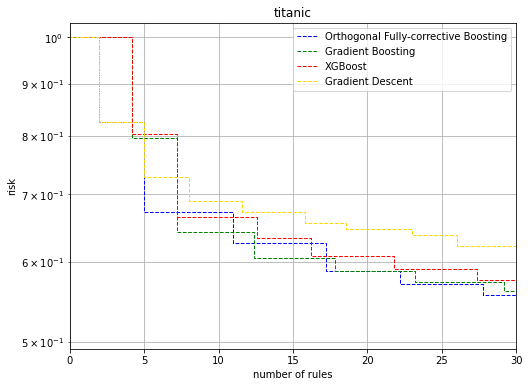

1
0:00:56.191902

0:00:56.813472

0:00:42.542242

0:00:49.405349

0:00:33.471633

orth_fc_Newton-CG: avg train risk: 0.5353418923826337 avg test risk 0.560820025847304 &s: 20.7
0:00:32.546603

0:00:27.343971

0:00:25.346252

0:00:30.449795

0:00:30.774207

gpe_boosting_: avg train risk: 0.5397645161218193 avg test risk 0.5833655812165542 &s: 25.78
0:00:24.540515

0:00:21.324784

0:00:23.183831

0:00:22.407670

0:00:23.853908

xgb_keep_: avg train risk: 0.5936726887392089 avg test risk 0.6388865101101647 &s: 27.18
0:00:05.610003

0:00:05.330167

0:00:05.888128

0:00:05.167403

0:00:05.853261

mwg_boosting_: avg train risk: 0.8025141146166128 avg test risk 0.8505754186780787 &s: 13.580000000000002
orth_fc_Newton-CG auc: 19.672112909822424
[2.0, 6.0, 10.0, 14.4, 18.4, 22.4, 27.0, 29.0, 35.8, 42.0] [0.8612646072238814, 0.7676874512732125, 0.6929761007509903, 0.6235721915895205, 0.549792833404012, 0.4807909431823408, 0.4229910785295498, 0.3561292368576884, 0.3168267221592037, 0.281387758855

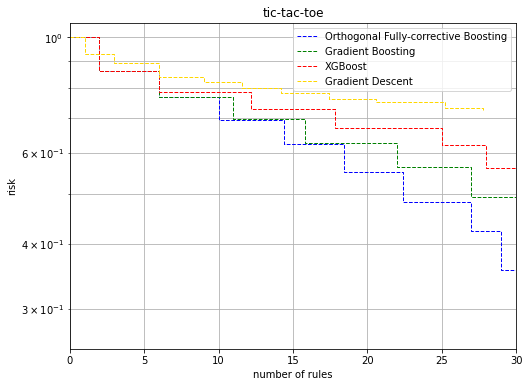

1.0
0:00:01.947188

0:00:02.349270

0:00:02.397440

0:00:01.736471

0:00:02.021812

orth_fc_Newton-CG: avg train risk: 0.21451796837097206 avg test risk 0.5057540579430347 &s: 21.419999999999998
0:00:01.642669

0:00:02.934350

0:00:02.235931

0:00:01.510674

0:00:01.723926

gpe_boosting_: avg train risk: 0.19805794967876345 avg test risk 0.40221466361195224 &s: 23.14
0:00:01.750733

0:00:02.156346

0:00:02.466481

0:00:01.835694

0:00:02.165905

xgb_keep_: avg train risk: 0.27825730776762836 avg test risk 0.3884195725916297 &s: 19.6
0:00:00.857186

0:00:00.784475

0:00:00.805908

0:00:00.705530

0:00:00.769735

mwg_boosting_: avg train risk: 0.2903016493274525 avg test risk 0.41164950224126295 &s: 16.259999999999998
orth_fc_Newton-CG auc: 9.519662512279295
[2.0, 5.6, 8.8, 13.2, 18.6, 24.4, 29.0, 33.2, 37.6, 41.8] [0.7723560421183912, 0.40235082498875235, 0.26732935907868216, 0.18049923874736187, 0.12832374598785432, 0.10151132498601978, 0.08948322984187577, 0.07659226373731193, 0.06684

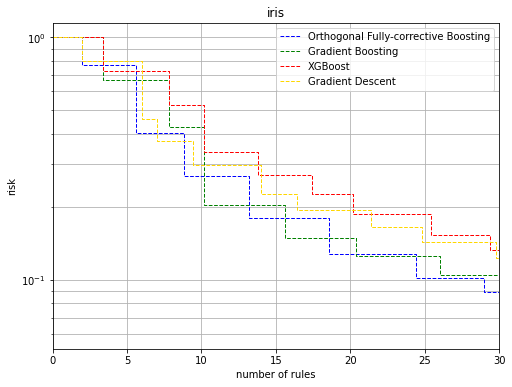

1.0
0:06:35.190419

0:02:54.061348

0:05:42.584482

0:02:49.487856

0:03:25.410332

orth_fc_Newton-CG: avg train risk: 0.21421657360352664 avg test risk 0.2618014979910403 &s: 30.02
0:02:30.036048

0:01:20.470334

0:02:36.230684

0:01:35.638421

0:01:38.436003

gpe_boosting_: avg train risk: 0.2246161782327758 avg test risk 0.2796206886595892 &s: 30.639999999999997
0:05:45.351435

0:01:45.152281

0:03:35.747883

0:02:19.409619

0:01:23.342988

xgb_keep_: avg train risk: 0.27953978625131054 avg test risk 0.289522877668412 &s: 24.02
0:00:10.566502

0:00:06.987724

0:00:07.863054

0:00:07.862146

0:00:09.245049

mwg_boosting_: avg train risk: 0.2719944165608358 avg test risk 0.22270375293239572 &s: 16.8
orth_fc_Newton-CG auc: 10.734617986029006
[2.0, 7.6, 12.4, 19.8, 26.2, 32.0, 39.2, 46.2, 53.6, 61.2] [0.5837924450570858, 0.32029422517734163, 0.25680065161420856, 0.21013206684827215, 0.1796836744957895, 0.1537949549082009, 0.13406600050662004, 0.11619484411414889, 0.09933410651605472, 0.

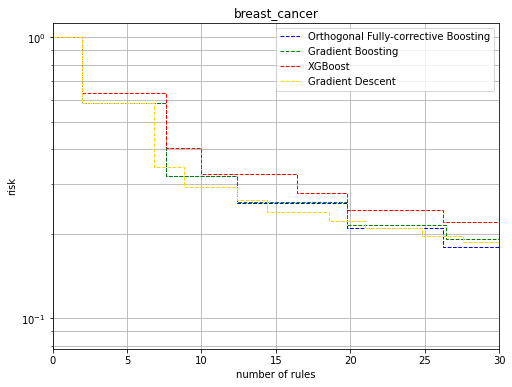

1.0
0:00:12.953592

0:00:11.901175

0:00:11.712564

0:01:36.485509

0:00:17.392971

orth_fc_Newton-CG: avg train risk: 0.13541392059940455 avg test risk 0.3173398638200499 &s: 23.32
0:00:10.119582

0:00:07.456779

0:00:09.755827

0:00:04.691970

0:00:06.542698

gpe_boosting_: avg train risk: 0.14685611898852158 avg test risk 0.3685668032384869 &s: 26.080000000000002
0:00:01.058435

0:00:01.087871

0:00:01.245195

0:00:01.270806

0:00:01.093223

xgb_keep_: avg train risk: 0.20154443867078758 avg test risk 0.3337093362915561 &s: 21.0
0:00:01.623626

0:00:01.624223

0:00:01.982509

0:00:02.468313

0:00:02.376862

mwg_boosting_: avg train risk: 0.20337040637959808 avg test risk 0.3231462239949459 &s: 16.14
orth_fc_Newton-CG auc: 7.221632709772086
[2.0, 5.8, 10.2, 15.6, 21.2, 25.8, 30.8, 35.4, 40.0, 46.4] [0.6742932705032747, 0.23363153115241939, 0.13240030334884678, 0.08240046062743282, 0.05849914394888082, 0.04424744405398752, 0.036439046699163924, 0.03505416057815765, 0.03012211893192605

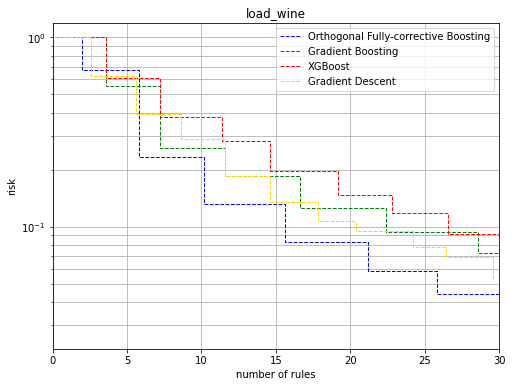

1.0
0:00:11.363191

0:00:11.423512

0:00:11.533416

0:00:11.421303

0:00:11.463512

orth_fc_Newton-CG: avg train risk: 0.5681487766431805 avg test risk 0.5988205634685655 &s: 13.88
0:00:07.819388

0:00:07.811803

0:00:07.545307

0:00:07.355018

0:00:06.908696

gpe_boosting_: avg train risk: 0.575117228231503 avg test risk 0.6080666844117469 &s: 13.419999999999998
0:00:20.141089

0:00:19.947741

0:00:20.099341

0:00:20.517821

0:00:20.542380

xgb_keep_: avg train risk: 0.5884136363114145 avg test risk 0.6280634224287353 &s: 12.8
0:00:16.088830

0:00:16.795768

0:00:14.196267

0:00:15.978906

0:00:15.274231

mwg_boosting_: avg train risk: 0.5871492884950891 avg test risk 0.6059385983152414 &s: 8.92
orth_fc_Newton-CG auc: 6.3581275209094
[1.0, 3.0, 5.4, 9.0, 11.6, 15.0, 18.8, 21.8, 24.6, 28.6] [0.6324112983795195, 0.597392455495398, 0.5800204781757289, 0.5714893095287816, 0.5636768347940783, 0.5580701093075457, 0.5522276475769956, 0.5465623983497085, 0.5415058510950199, 0.5381313837290296

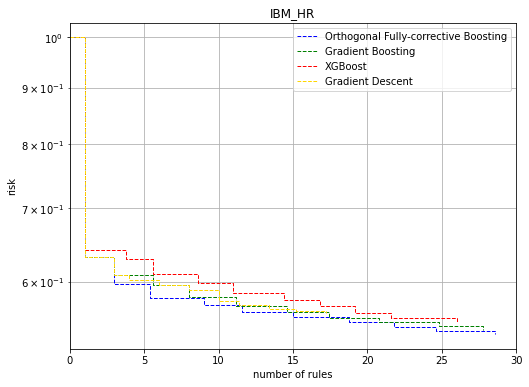

1.0
1:29:03.457245

orth fc Newton-CG does not exist: 
../experiment_output__normalised/telco_churn/telco_churn_orth_fc_Newton-CG_realkd_col_4_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/telco_churn/telco_churn_orth_fc_Newton-CG_realkd_col_4_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/telco_churn/telco_churn_orth_fc_Newton-CG_realkd_col_4_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/telco_churn/telco_churn_orth_fc_Newton-CG_realkd_col_4_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.6647405355922625 avg test risk 0.659977015457756 &s: 24.2
1:27:46.026793

gpe boosting  does not exist: 
../experiment_output__normalised/telco_churn/telco_churn_gpe_boosting__realkd_col_4_rep1.txt
gpe boosting  does not exist: 
../experiment_output__normalised/telco_churn/telco_churn_gpe_boosting__realkd_col_4_rep2.txt
gpe boosting  does not exist: 
../experiment_output__normalised/telco_churn/telco_churn_gpe_b

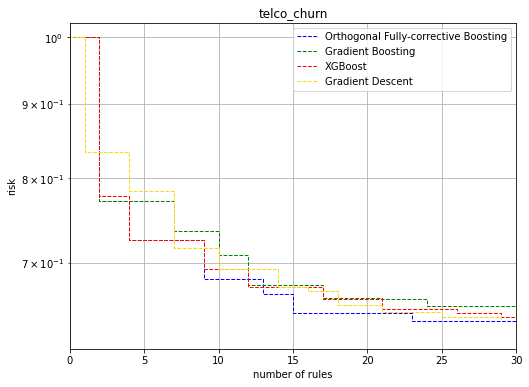

1.0
0:00:28.466179

orth fc Newton-CG does not exist: 
../experiment_output__normalised/GenderRecognition/GenderRecognition_orth_fc_Newton-CG_realkd_col_3_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/GenderRecognition/GenderRecognition_orth_fc_Newton-CG_realkd_col_3_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/GenderRecognition/GenderRecognition_orth_fc_Newton-CG_realkd_col_3_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/GenderRecognition/GenderRecognition_orth_fc_Newton-CG_realkd_col_3_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.9968626792532731 avg test risk 0.9985547179633809 &s: 11.0
0:00:42.661623

gpe boosting  does not exist: 
../experiment_output__normalised/GenderRecognition/GenderRecognition_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output__normalised/GenderRecognition/GenderRecognition_gpe_boosting__realkd_col_3_rep2.txt
gpe boosting  does n

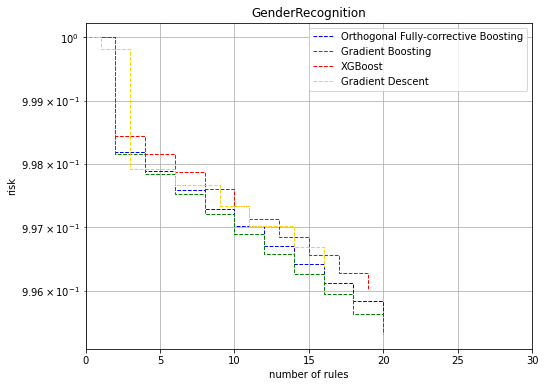

1.0
0:00:07.262366

0:00:06.796653

0:00:06.666766

0:00:07.530102

0:00:06.701611

orth_fc_Newton-CG: avg train risk: 0.22172285493415758 avg test risk 0.23742681559231907 &s: 23.0
0:00:10.299561

0:00:09.987636

0:00:09.941117

0:00:11.009945

0:00:09.138975

gpe_boosting_: avg train risk: 0.24643130378870182 avg test risk 0.2604116511667621 &s: 23.32
0:00:12.146404

0:00:14.941908

0:00:16.503394

0:00:13.403076

0:00:12.147945

xgb_keep_: avg train risk: 0.3093574951891346 avg test risk 0.3184472486166464 &s: 18.28
0:00:06.380841

0:00:06.440177

0:00:06.413420

0:00:07.334480

0:00:05.888998

mwg_boosting_: avg train risk: 0.33333281339211274 avg test risk 0.3508743123387711 &s: 16.18
orth_fc_Newton-CG auc: 10.11596038415601
[2.0, 5.0, 10.0, 14.8, 19.2, 25.4, 31.0, 35.6, 40.6, 46.4] [0.7024743018761679, 0.4308200277297833, 0.3065079664199981, 0.20716626090224693, 0.1492459598285199, 0.11877013090345408, 0.0948368025895414, 0.07881758231442183, 0.06842956770946056, 0.06015994906798

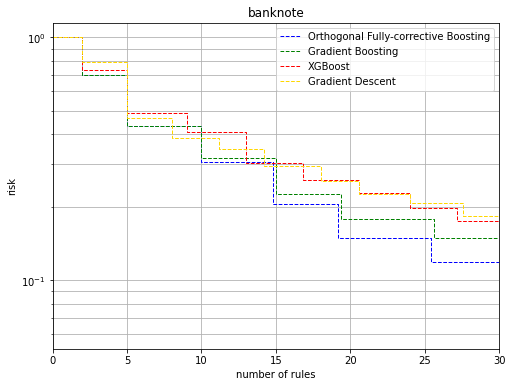

1.0
0:04:01.653955

0:04:35.631609

0:03:56.360897

0:04:00.962966

0:02:57.894773

orth_fc_Newton-CG: avg train risk: 0.6838363746556484 avg test risk 1.0878340766683654 &s: 32.839999999999996
0:03:17.932806

0:02:32.119685

0:02:01.018480

0:02:43.001635

0:01:31.690605

gpe_boosting_: avg train risk: 0.6897434326221928 avg test risk 1.0426888685664881 &s: 31.380000000000003
0:05:24.696868

0:05:48.628868

0:04:59.050549

0:04:48.829608

0:04:05.704987

xgb_keep_: avg train risk: 0.7203272241784364 avg test risk 0.9290866548856178 &s: 30.0
0:00:02.231975

0:00:01.935686

0:00:01.922325

0:00:02.158705

0:00:01.824658

mwg_boosting_: avg train risk: 0.8201143601209596 avg test risk 0.8992232176504149 &s: 18.259999999999998
orth_fc_Newton-CG auc: 25.10116250289356
[3.6, 9.4, 14.8, 21.8, 28.4, 36.6, 43.4, 50.0, 56.2, 64.2] [0.9354901082481775, 0.8469711392025812, 0.7882893768486288, 0.739963426755748, 0.6874321680199083, 0.6433280732678495, 0.6010985246650745, 0.5651407847111221, 0.5329

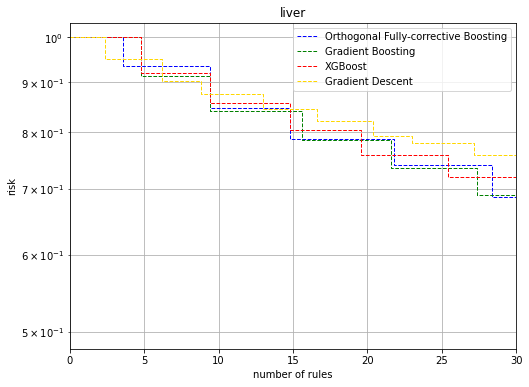

1.0
0:02:18.946729

orth fc Newton-CG does not exist: 
../experiment_output__normalised/magic/magic_orth_fc_Newton-CG_realkd_col_5_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/magic/magic_orth_fc_Newton-CG_realkd_col_5_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/magic/magic_orth_fc_Newton-CG_realkd_col_5_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/magic/magic_orth_fc_Newton-CG_realkd_col_5_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.7014541191007349 avg test risk 0.6808827433299356 &s: 20.9
0:01:11.103899

gpe boosting  does not exist: 
../experiment_output__normalised/magic/magic_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output__normalised/magic/magic_gpe_boosting__realkd_col_5_rep2.txt
gpe boosting  does not exist: 
../experiment_output__normalised/magic/magic_gpe_boosting__realkd_col_5_rep3.txt
gpe boosting  does not exist: 
../experiment_output_

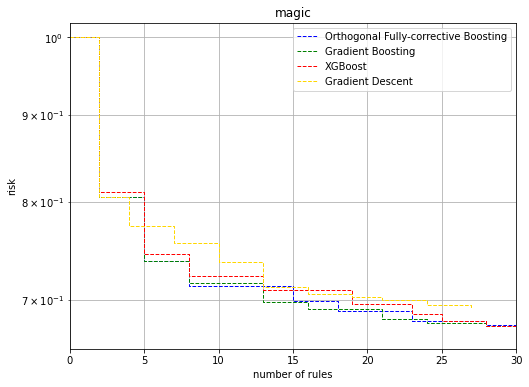

1.0
0:05:47.502158

orth fc Newton-CG does not exist: 
../experiment_output__normalised/adult/adult_orth_fc_Newton-CG_realkd_col_5_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/adult/adult_orth_fc_Newton-CG_realkd_col_5_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/adult/adult_orth_fc_Newton-CG_realkd_col_5_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/adult/adult_orth_fc_Newton-CG_realkd_col_5_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.5737933454479414 avg test risk 0.5871183516653498 &s: 17.8
0:06:32.009656

gpe boosting  does not exist: 
../experiment_output__normalised/adult/adult_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output__normalised/adult/adult_gpe_boosting__realkd_col_5_rep2.txt
gpe boosting  does not exist: 
../experiment_output__normalised/adult/adult_gpe_boosting__realkd_col_5_rep3.txt
gpe boosting  does not exist: 
../experiment_output_

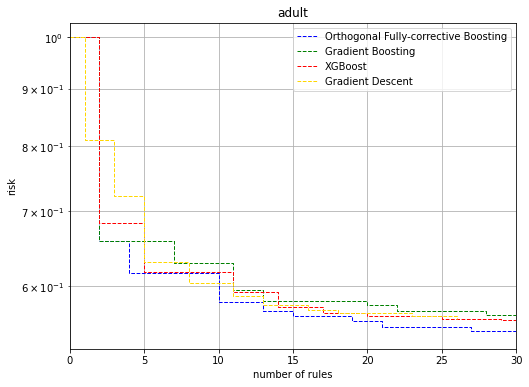

1.0
0:02:05.840464

orth fc Newton-CG does not exist: 
../experiment_output__normalised/digits5/digits5_orth_fc_Newton-CG_realkd_col_3_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/digits5/digits5_orth_fc_Newton-CG_realkd_col_3_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/digits5/digits5_orth_fc_Newton-CG_realkd_col_3_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/digits5/digits5_orth_fc_Newton-CG_realkd_col_3_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.3662120452353713 avg test risk 0.35506479821687975 &s: 15.8
0:01:50.735364

gpe boosting  does not exist: 
../experiment_output__normalised/digits5/digits5_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output__normalised/digits5/digits5_gpe_boosting__realkd_col_3_rep2.txt
gpe boosting  does not exist: 
../experiment_output__normalised/digits5/digits5_gpe_boosting__realkd_col_3_rep3.txt
gpe boosting  does not 

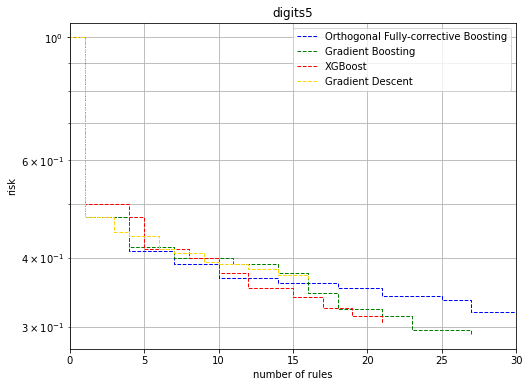

322646873.58870494
0:00:27.662458

0:00:27.919716

0:00:29.210874

0:00:29.716609

0:00:27.892610

orth_fc_Newton-CG: avg train risk: 0.11437779615854267 avg test risk 0.11166033703732237 &s: 16.44
0:00:21.593408

0:00:18.501716

0:00:20.020005

0:00:19.588981

0:00:17.814898

gpe_boosting_: avg train risk: 0.125251043299104 avg test risk 0.1175901168719039 &s: 19.72
0:00:39.236089

0:00:38.568170

0:00:36.877718

0:00:37.704783

0:00:35.721281

xgb_keep_: avg train risk: 0.1252510448694853 avg test risk 0.11759012007350571 &s: 19.72
0:00:08.041150

0:00:11.164267

0:00:11.759230

0:00:11.403945

0:00:12.140255

mwg_boosting_: avg train risk: 0.18325283196411737 avg test risk 0.16979881308874178 &s: 11.34
orth_fc_Newton-CG auc: 4.980201996428164
[2.0, 4.0, 7.0, 8.6, 10.4, 13.6, 20.8, 25.8, 33.0, 39.2] [0.35013207679530217, 0.16442532141363891, 0.11188534808971318, 0.08950073600813516, 0.08007206289388955, 0.07510212861975876, 0.07184755760506643, 0.06912863845009905, 0.0668247705174253

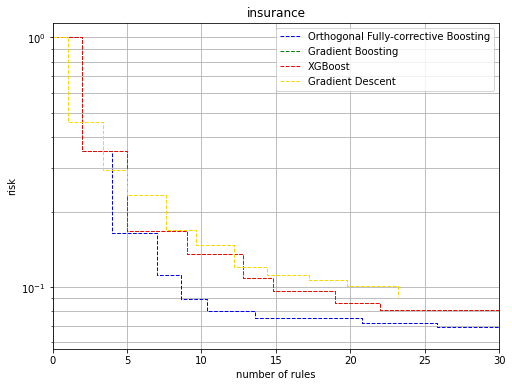

226.89125115757616
0:00:06.790826

0:00:06.406826

0:00:05.804574

0:00:05.875000

0:00:06.222089

orth_fc_Newton-CG: avg train risk: 0.053573506838416454 avg test risk 0.059600905538132784 &s: 19.8
0:00:05.689761

0:00:05.140615

0:00:05.509278

0:00:04.872599

0:00:05.523314

gpe_boosting_: avg train risk: 0.05671614185928305 avg test risk 0.0632130976626977 &s: 19.7
0:00:13.491039

0:00:12.054239

0:00:12.336082

0:00:11.772370

0:00:12.269349

xgb_keep_: avg train risk: 0.056716136488661695 avg test risk 0.06321309401404415 &s: 19.7
0:00:02.884560

0:00:02.833676

0:00:02.519602

0:00:02.786933

0:00:02.948796

mwg_boosting_: avg train risk: 0.060971595309578096 avg test risk 0.06163287505209497 &s: 10.16
orth_fc_Newton-CG auc: 2.602980912692833
[1.0, 3.8, 6.8, 10.2, 13.8, 19.2, 25.6, 32.6, 39.4, 45.6] [0.10580903005403948, 0.07534771809497495, 0.05969078899563144, 0.05010088330894128, 0.04488022313108477, 0.04274252413831001, 0.041239830083231885, 0.03989385209549244, 0.0386538864

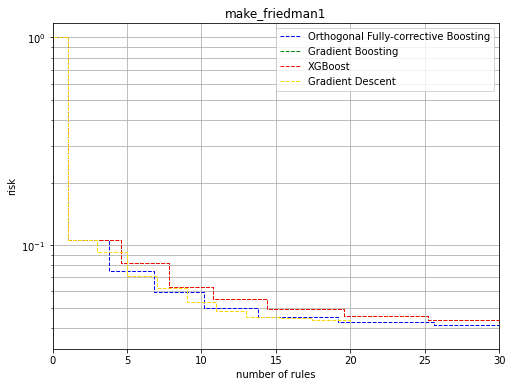

379683.4049960418
0:00:11.928032

0:00:13.117234

0:00:12.953111

0:00:12.366474

0:00:12.863643

orth_fc_Newton-CG: avg train risk: 0.06164737651450021 avg test risk 0.06210497861046229 &s: 16.6
0:00:18.217274

0:00:18.078221

0:00:17.035467

0:00:21.259738

0:00:24.024245

gpe_boosting_: avg train risk: 0.07860559818208859 avg test risk 0.07955431300749086 &s: 17.880000000000003
0:00:30.165748

0:00:32.636423

0:00:31.347028

0:00:29.121703

0:00:29.715932

xgb_keep_: avg train risk: 0.07860560158742215 avg test risk 0.0795543168925634 &s: 17.880000000000003
0:00:23.140322

0:00:19.489475

0:00:26.289525

0:00:23.059150

0:00:22.457875

mwg_boosting_: avg train risk: 0.11444404450585652 avg test risk 0.11717588604878815 &s: 12.58
orth_fc_Newton-CG auc: 4.686665387745579
[3.0, 6.0, 8.0, 10.0, 13.0, 17.4, 22.0, 25.4, 28.8, 32.4] [0.21885211836639087, 0.11939359910581626, 0.07491917291746612, 0.05507940988027684, 0.038626664204362976, 0.030878367796812994, 0.0216023808826815, 0.02003813

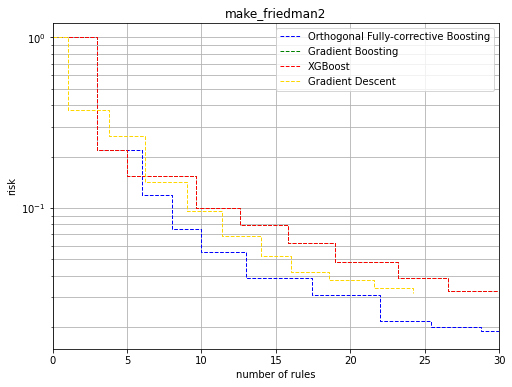

1.8780821278399789
0:00:11.548732

0:00:12.022559

0:00:14.208259

0:00:11.733474

0:00:12.316637

orth_fc_Newton-CG: avg train risk: 0.02317568910689253 avg test risk 0.02647439500674808 &s: 18.3
0:00:12.563387

0:00:12.446578

0:00:14.377992

0:00:12.846881

0:00:11.597241

gpe_boosting_: avg train risk: 0.024578859060122756 avg test risk 0.027921018868654102 &s: 19.919999999999998
0:00:27.551315

0:00:26.336665

0:00:31.114221

0:00:27.411608

0:00:24.701053

xgb_keep_: avg train risk: 0.024578862019256714 avg test risk 0.02792101939896925 &s: 19.919999999999998
0:00:07.562229

0:00:08.286202

0:00:09.540727

0:00:08.161126

0:00:08.013266

mwg_boosting_: avg train risk: 0.028446924576172056 avg test risk 0.030587463674097048 &s: 14.0
orth_fc_Newton-CG auc: 1.7155362277178654
[1.0, 4.4, 7.8, 11.4, 14.8, 19.0, 23.0, 28.6, 34.0, 39.0] [0.05192118428320196, 0.03156312378799986, 0.024199805425244848, 0.02110132621064921, 0.019188102657747272, 0.01808333327813307, 0.017246285249422417, 0

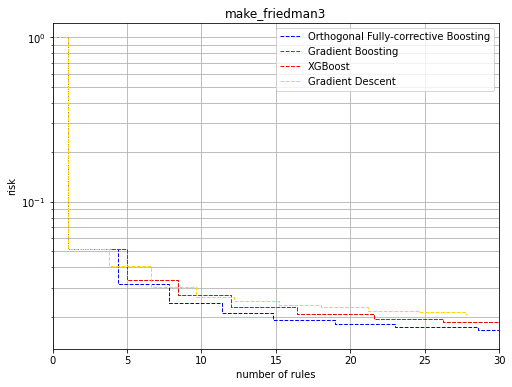

2029057842.6515312
0:00:19.776356

0:00:20.617100

0:00:19.595841

0:00:18.979058

0:00:24.242101

orth_fc_Newton-CG: avg train risk: 0.3298988685304777 avg test risk 0.38318094818844495 &s: 22.419999999999998
0:00:19.815312

0:00:20.750349

0:00:21.600666

0:00:20.983274

0:00:23.165969

gpe_boosting_: avg train risk: 0.339938348273477 avg test risk 0.38007905751338356 &s: 23.68
0:00:28.875433

0:00:31.527602

0:00:29.589305

0:00:24.819407

0:00:33.205879

xgb_keep_: avg train risk: 0.33993834911657417 avg test risk 0.3800790436380486 &s: 23.68
0:00:04.761036

0:00:07.593006

0:00:11.265650

0:00:11.837440

0:00:09.926343

mwg_boosting_: avg train risk: 0.3741585039939354 avg test risk 0.3761423186887246 &s: 14.419999999999998
orth_fc_Newton-CG auc: 11.434485665625825
[1.0, 6.4, 10.2, 14.2, 20.2, 24.4, 28.6, 34.4, 39.8, 45.0] [0.4842848835817179, 0.3877712256982776, 0.3506753724350897, 0.3275594152438476, 0.31193375389009803, 0.29992337880998704, 0.29139907006235155, 0.28593134035651

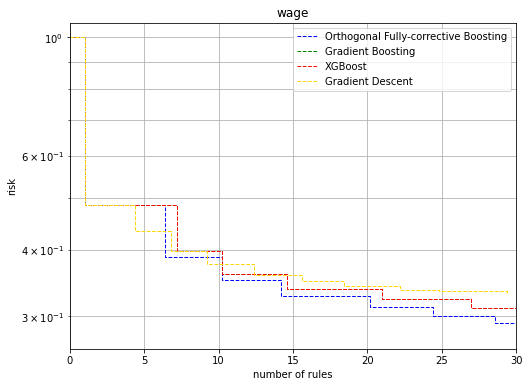

31.64835409252669
0:00:30.421106

0:00:30.200565

0:00:30.306540

0:00:30.491958

0:00:30.544865

orth_fc_Newton-CG: avg train risk: 0.20065370474560545 avg test risk 0.2040118892993723 &s: 12.7
0:00:22.506229

0:00:21.632459

0:00:24.180944

0:00:20.892339

0:00:19.321351

gpe_boosting_: avg train risk: 0.20246693348496655 avg test risk 0.20586809318159704 &s: 12.440000000000001
0:00:49.461901

0:00:49.687397

0:00:49.665054

0:00:49.578329

0:00:49.411845

xgb_keep_: avg train risk: 0.20246693196627588 avg test risk 0.2058680888867706 &s: 12.440000000000001
0:00:27.301547

0:00:34.124039

0:00:47.024230

0:00:36.799046

0:00:36.623566

mwg_boosting_: avg train risk: 0.20624130582353736 avg test risk 0.20870598795254663 &s: 8.24
orth_fc_Newton-CG auc: 6.295602033077734
[1.0, 3.0, 5.0, 7.0, 10.8, 13.4, 16.4, 19.4, 23.4, 27.6] [0.2424067272009615, 0.20866226506646415, 0.19994798507212697, 0.1972178119353882, 0.19511563947981872, 0.19380858788210434, 0.19287043961214914, 0.19243829425562

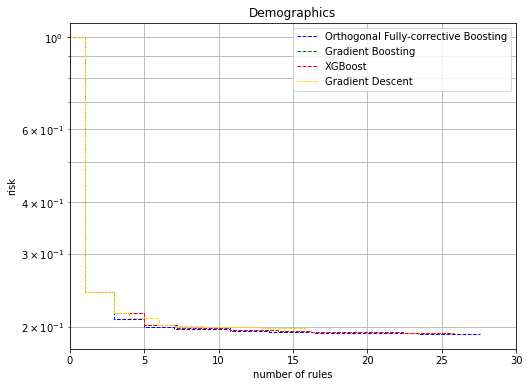

43.986571428571416
0:00:00.180501

0:00:00.205123

0:00:00.179602

0:00:00.189999

0:00:00.183984

orth_fc_Newton-CG: avg train risk: 0.004414022822460403 avg test risk 0.0055367123835312155 &s: 12.379999999999999
0:00:00.245277

0:00:00.248409

0:00:00.297339

0:00:00.273962

0:00:00.248641

gpe_boosting_: avg train risk: 0.00489617217241471 avg test risk 0.005822101846289536 &s: 11.98
0:00:00.133610

0:00:00.107460

0:00:00.116987

0:00:00.132455

0:00:00.173514

xgb_keep_: avg train risk: 0.0048961735285568365 avg test risk 0.00581461768431303 &s: 11.98
0:00:00.093007

0:00:00.104764

0:00:00.101145

0:00:00.098520

0:00:00.110034

mwg_boosting_: avg train risk: 0.005081258050224734 avg test risk 0.005960781311776069 &s: 11.28
orth_fc_Newton-CG auc: 1.102441134376797
[1.0, 3.0, 5.6, 8.4, 11.0, 13.4, 16.0, 18.8, 21.8, 24.8] [0.01186360447669094, 0.004592890594624891, 0.003882397289800848, 0.0036283658547839825, 0.0034819053265194725, 0.0033966736888121837, 0.00334700744582537, 0.0033

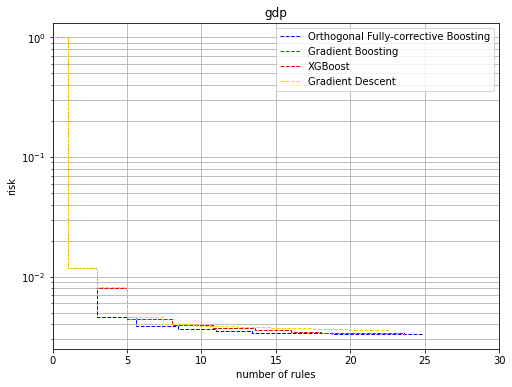

194464336.77843493
0:00:12.600429

0:00:12.348913

0:00:11.407194

0:00:13.070602

0:00:12.893168

orth_fc_Newton-CG: avg train risk: 0.09842655945431904 avg test risk 0.1056039921240548 &s: 16.8
0:00:17.243317

0:00:16.845097

0:00:15.557145

0:00:19.149182

0:00:18.226137

gpe_boosting_: avg train risk: 0.12023072606557723 avg test risk 0.1314479114610583 &s: 19.78
0:00:35.145528

0:00:35.681331

0:00:32.213457

0:00:36.183343

0:00:35.266361

xgb_keep_: avg train risk: 0.12023073309485448 avg test risk 0.13144792092172825 &s: 19.78
0:00:06.915795

0:00:14.682483

0:00:15.908080

0:00:13.060375

0:00:15.587874

mwg_boosting_: avg train risk: 0.1396373214972474 avg test risk 0.14733215128258506 &s: 14.52
orth_fc_Newton-CG auc: 5.738548485593683
[3.0, 5.8, 8.6, 10.8, 13.6, 17.4, 21.6, 25.6, 28.6, 33.0] [0.2684135938835004, 0.1816661070604762, 0.11191931686661283, 0.09095798897109068, 0.07228798536884888, 0.062042498938126966, 0.055852476720825314, 0.05109586984266514, 0.046750071694207

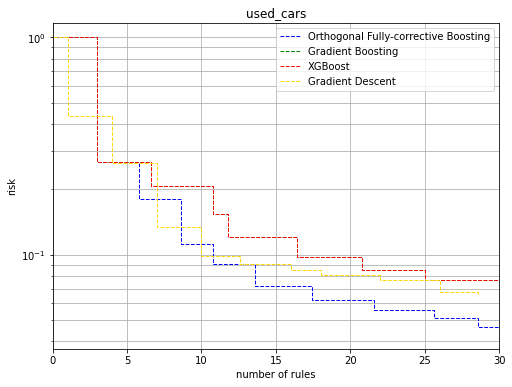

29074.481900452487
0:00:07.816612

0:00:06.770259

0:00:07.955026

0:00:07.295154

0:00:07.805662

orth_fc_Newton-CG: avg train risk: 0.11762531057859855 avg test risk 0.1440596835876041 &s: 21.02
0:00:05.945468

0:00:05.395446

0:00:05.597840

0:00:06.014953

0:00:06.113652

gpe_boosting_: avg train risk: 0.12225944285683625 avg test risk 0.14126447913012946 &s: 22.380000000000003
0:00:09.067059

0:00:08.613623

0:00:08.517901

0:00:09.242031

0:00:09.188775

xgb_keep_: avg train risk: 0.12225943596752613 avg test risk 0.14126447337703657 &s: 22.380000000000003
0:00:02.632500

0:00:02.715861

0:00:02.456787

0:00:02.543310

0:00:02.642679

mwg_boosting_: avg train risk: 0.13254107100439527 avg test risk 0.13998244843776114 &s: 11.879999999999999
orth_fc_Newton-CG auc: 4.575387722218531
[1.0, 4.2, 6.6, 10.4, 16.0, 23.2, 29.0, 33.8, 39.6, 46.4] [0.2038385098440334, 0.1384861122141438, 0.12178496854650574, 0.11391423233727871, 0.10862986742893768, 0.10459434841196838, 0.10125297356042948

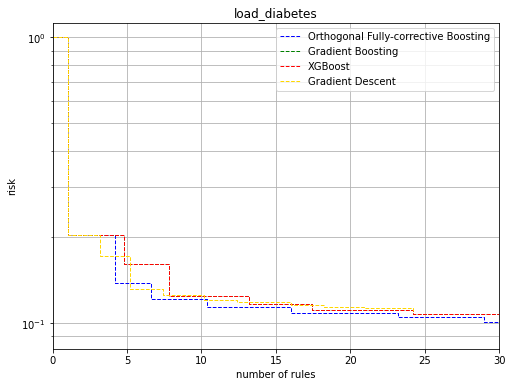

592.1469169960473
0:00:08.086080

0:00:08.732868

0:00:07.936701

0:00:08.811482

0:00:09.385669

orth_fc_Newton-CG: avg train risk: 0.06657969688155173 avg test risk 0.06423625013522145 &s: 21.119999999999997
0:00:08.584269

0:00:08.202827

0:00:07.404439

0:00:08.756969

0:00:07.982916

gpe_boosting_: avg train risk: 0.07190101209592796 avg test risk 0.06947908596214722 &s: 20.78
0:00:15.868173

0:00:16.307420

0:00:16.017498

0:00:17.527905

0:00:15.409528

xgb_keep_: avg train risk: 0.07190101520641501 avg test risk 0.06947908713948206 &s: 20.78
0:00:04.974339

0:00:03.644551

0:00:03.983292

0:00:03.442617

0:00:03.662750

mwg_boosting_: avg train risk: 0.08425138997844031 avg test risk 0.06773754516576595 &s: 11.4
orth_fc_Newton-CG auc: 3.0999664375104334
[1.0, 4.2, 9.2, 13.2, 18.6, 23.0, 28.2, 33.4, 37.4, 43.0] [0.1490775557495277, 0.08186512622455275, 0.06914911437900617, 0.059998994409171016, 0.055375472027271486, 0.05323504993457558, 0.05140403560213639, 0.04992082620216377, 

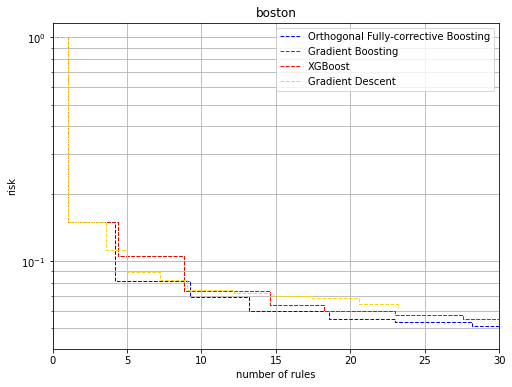

30.46778212179487
0:00:18.202532

0:00:31.827147

0:00:24.974592

0:00:22.343878

0:00:22.760077

orth_fc_Newton-CG: avg train risk: 0.011057831918447784 avg test risk 0.017780851602805736 &s: 22.34
0:00:09.062353

0:00:15.352432

0:00:12.668983

0:00:16.404752

0:00:15.453895

gpe_boosting_: avg train risk: 0.0126474076589238 avg test risk 0.019082029113571868 &s: 23.8
0:00:20.148138

0:00:31.773815

0:00:23.087676

0:00:27.191979

0:00:29.641425

xgb_keep_: avg train risk: 0.012647405182072894 avg test risk 0.019082031198412966 &s: 23.8
0:00:00.556628

0:00:00.533684

0:00:00.491849

0:00:00.652178

0:00:00.572886

mwg_boosting_: avg train risk: 0.015452173129153406 avg test risk 0.016526862111264425 &s: 12.48
orth_fc_Newton-CG auc: 1.396666533789995
[1.0, 5.0, 9.0, 11.8, 16.4, 23.2, 29.4, 36.2, 42.8, 48.6] [0.04058419814681026, 0.017012643767383432, 0.011729350593823068, 0.008660440439554867, 0.007384566056514839, 0.006453135016763312, 0.005624120267216372, 0.004929528337765171, 0.0

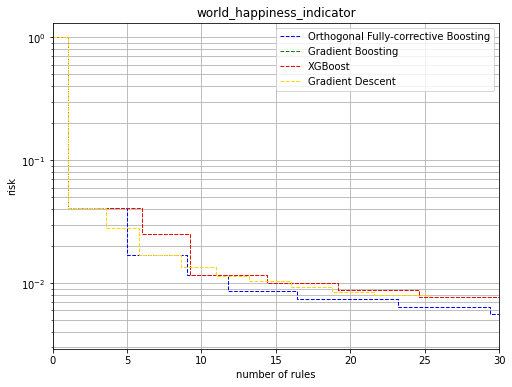

4882.764241803283
0:02:30.611859

orth fc Newton-CG does not exist: 
../experiment_output__normalised/who_life_expectancy/who_life_expectancy_orth_fc_Newton-CG_realkd_col_5_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/who_life_expectancy/who_life_expectancy_orth_fc_Newton-CG_realkd_col_5_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/who_life_expectancy/who_life_expectancy_orth_fc_Newton-CG_realkd_col_5_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/who_life_expectancy/who_life_expectancy_orth_fc_Newton-CG_realkd_col_5_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.0056696011947905455 avg test risk 0.00681689768923372 &s: 26.3
0:00:55.458476

gpe boosting  does not exist: 
../experiment_output__normalised/who_life_expectancy/who_life_expectancy_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output__normalised/who_life_expectancy/who_life_expectancy_gpe_boosting__

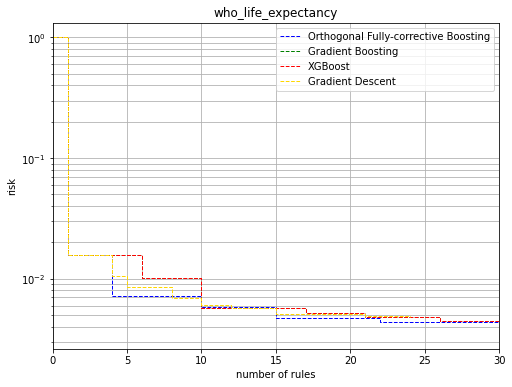

3.5
0:18:20.723857

orth fc Newton-CG does not exist: 
../experiment_output__normalised/mobile_prices/mobile_prices_orth_fc_Newton-CG_realkd_col_4_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/mobile_prices/mobile_prices_orth_fc_Newton-CG_realkd_col_4_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/mobile_prices/mobile_prices_orth_fc_Newton-CG_realkd_col_4_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/mobile_prices/mobile_prices_orth_fc_Newton-CG_realkd_col_4_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.1036407858942616 avg test risk 0.11529409256685555 &s: 27.5
0:12:55.359068

gpe boosting  does not exist: 
../experiment_output__normalised/mobile_prices/mobile_prices_gpe_boosting__realkd_col_4_rep1.txt
gpe boosting  does not exist: 
../experiment_output__normalised/mobile_prices/mobile_prices_gpe_boosting__realkd_col_4_rep2.txt
gpe boosting  does not exist: 
../experiment_output__normalised/mob

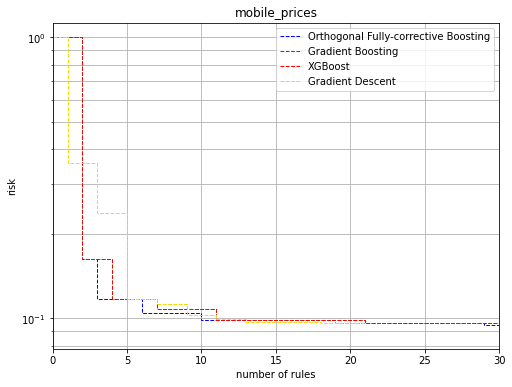

523.7783290690134
0:02:58.794213

orth fc Newton-CG does not exist: 
../experiment_output__normalised/suicide_rates_cleaned/suicide_rates_cleaned_orth_fc_Newton-CG_realkd_col_3_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/suicide_rates_cleaned/suicide_rates_cleaned_orth_fc_Newton-CG_realkd_col_3_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/suicide_rates_cleaned/suicide_rates_cleaned_orth_fc_Newton-CG_realkd_col_3_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/suicide_rates_cleaned/suicide_rates_cleaned_orth_fc_Newton-CG_realkd_col_3_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.5254015071424118 avg test risk 0.5046732213565607 &s: 13.2
0:02:41.122020

gpe boosting  does not exist: 
../experiment_output__normalised/suicide_rates_cleaned/suicide_rates_cleaned_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output__normalised/suicide_rates_cleaned/suicide_rates_cl

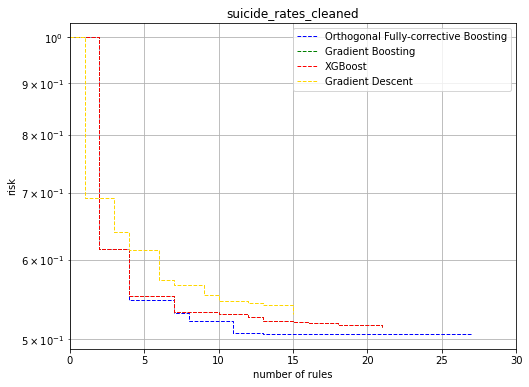

2.70680865164444
0:00:37.720441

orth fc Newton-CG does not exist: 
../experiment_output__normalised/videogamesales/videogamesales_orth_fc_Newton-CG_realkd_col_3_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/videogamesales/videogamesales_orth_fc_Newton-CG_realkd_col_3_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/videogamesales/videogamesales_orth_fc_Newton-CG_realkd_col_3_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output__normalised/videogamesales/videogamesales_orth_fc_Newton-CG_realkd_col_3_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.952160798896561 avg test risk 0.7139165351433903 &s: 10.8
0:00:58.912269

gpe boosting  does not exist: 
../experiment_output__normalised/videogamesales/videogamesales_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output__normalised/videogamesales/videogamesales_gpe_boosting__realkd_col_3_rep2.txt
gpe boosting  does not exist: 
../experiment

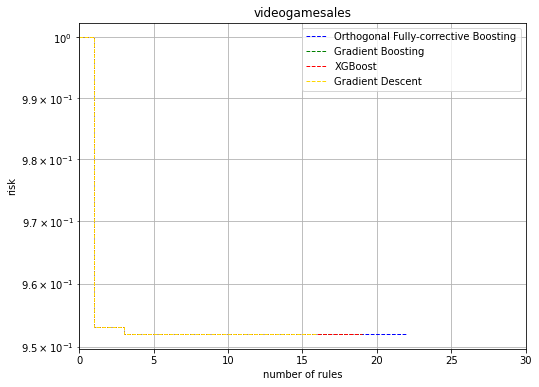

32.41651031894934
0:00:37.582381

0:00:36.692433

0:00:32.832412

0:00:40.191288

0:00:38.966321

orth_fc_Newton-CG: avg train risk: 0.01480847683596378 avg test risk 0.015467038970163688 &s: 22.380000000000003
0:00:30.034558

gpe boosting  does not exist: 
../experiment_output__normalised/red_wine_quality/red_wine_quality_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output__normalised/red_wine_quality/red_wine_quality_gpe_boosting__realkd_col_5_rep2.txt
gpe boosting  does not exist: 
../experiment_output__normalised/red_wine_quality/red_wine_quality_gpe_boosting__realkd_col_5_rep3.txt
gpe boosting  does not exist: 
../experiment_output__normalised/red_wine_quality/red_wine_quality_gpe_boosting__realkd_col_5_rep4.txt
gpe_boosting_: avg train risk: 0.014951822549859075 avg test risk 0.016302923778737002 &s: 20.5
0:00:17.715200

xgb keep  does not exist: 
../experiment_output__normalised/red_wine_quality/red_wine_quality_xgb_keep__realkd_col_5_rep1.txt

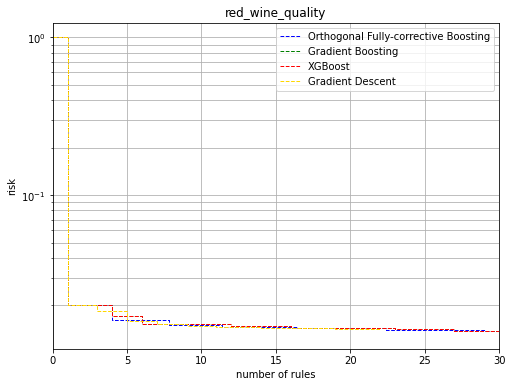

51.62076805721374
0:00:00.566308

0:00:00.574820

0:00:00.645643

0:00:00.646324

0:00:00.502495

orth_fc_Newton-CG: avg train risk: 0.10122063082559463 avg test risk 0.10939665754487597 &s: 15.52
0:00:00.804788

0:00:00.615599

0:00:00.818716

0:00:00.715165

0:00:00.691831

gpe_boosting_: avg train risk: 0.11307162110142277 avg test risk 0.10581011837941634 &s: 16.240000000000002
0:00:01.415755

0:00:01.525474

0:00:01.610813

0:00:01.523070

0:00:01.436780

xgb_keep_: avg train risk: 0.5855423774096364 avg test risk 0.6096368981659877 &s: 15.24
0:00:00.611561

0:00:00.476267

0:00:00.587172

0:00:00.677545

0:00:00.547703

mwg_boosting_: avg train risk: 0.1261498470117211 avg test risk 0.14437932836332742 &s: 13.34
orth_fc_Newton-CG auc: 5.309056807414475
[2.6, 5.6, 7.6, 10.2, 13.0, 16.8, 20.2, 23.4, 26.4, 29.4] [0.25181403475037134, 0.19409811926688034, 0.1597048633362434, 0.08277868312414081, 0.06357567308097925, 0.05896511748688995, 0.05570725950483831, 0.051554202434967736, 0.04

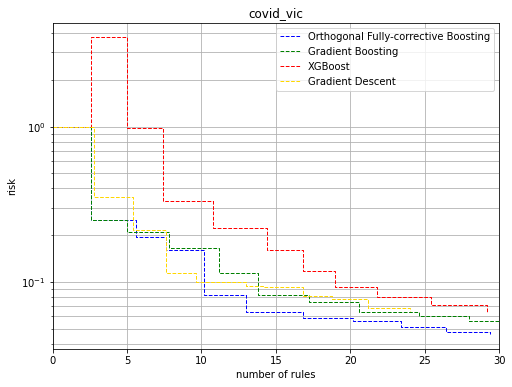

1082.8170359400497
0:00:00.843958

0:00:00.835367

0:00:00.827324

0:00:00.835492

0:00:00.817372

orth_fc_Newton-CG: avg train risk: 0.3125675087882435 avg test risk 0.4397852838088189 &s: 20.4
0:00:00.994270

0:00:01.058984

0:00:01.271953

0:00:00.904008

0:00:00.899104

gpe_boosting_: avg train risk: 0.32822986406309024 avg test risk 0.44474026153866014 &s: 20.22
0:00:02.125312

0:00:02.162804

0:00:02.192076

0:00:02.095696

0:00:02.189100

xgb_keep_: avg train risk: 3.8154824915516867 avg test risk 5.498180283084645 &s: 18.96
0:00:00.830242

0:00:00.753290

0:00:01.655807

0:00:00.909234

0:00:01.008931

mwg_boosting_: avg train risk: 0.35077326455370617 avg test risk 0.44826810771349646 &s: 14.4
orth_fc_Newton-CG auc: 12.254667499475751
[3.6, 6.6, 10.4, 14.0, 17.8, 22.2, 26.4, 30.4, 34.2, 38.4] [0.5364849337775908, 0.34175088845214335, 0.32214656094839367, 0.3000331658892551, 0.2873923581306984, 0.2832272324164258, 0.27572914452982955, 0.2673190073083435, 0.2597180777747957, 0.2

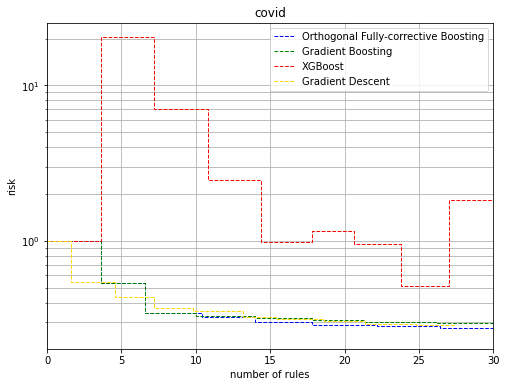

1076.416963882381
0:00:01.627127

0:00:01.792288

0:00:01.777169

0:00:01.875940

0:00:01.768049

orth_fc_Newton-CG: avg train risk: 0.24620060566596114 avg test risk 0.4208737596918831 &s: 24.32
0:00:02.005940

0:00:01.901274

0:00:01.705145

0:00:01.910471

0:00:01.960818

gpe_boosting_: avg train risk: 0.2537584731249193 avg test risk 0.4141429259642206 &s: 24.380000000000003
0:00:03.309072

0:00:03.909206

0:00:03.536613

0:00:03.565829

0:00:03.359650

xgb_keep_: avg train risk: 0.26762845583758266 avg test risk 0.3908227671940604 &s: 22.259999999999998
0:00:00.860542

0:00:00.772660

0:00:00.724627

0:00:00.799378

0:00:00.803842

mwg_boosting_: avg train risk: 0.3790498657350512 avg test risk 0.43244825649217694 &s: 14.219999999999999
orth_fc_Newton-CG auc: 12.029016604982615
[4.4, 7.6, 11.8, 16.6, 21.8, 26.4, 31.4, 36.8, 41.0, 45.4] [0.6367641460434064, 0.3308205693521281, 0.27443113602992353, 0.23569038588890137, 0.21216389032435626, 0.1897532198074493, 0.16758387537852432, 0.

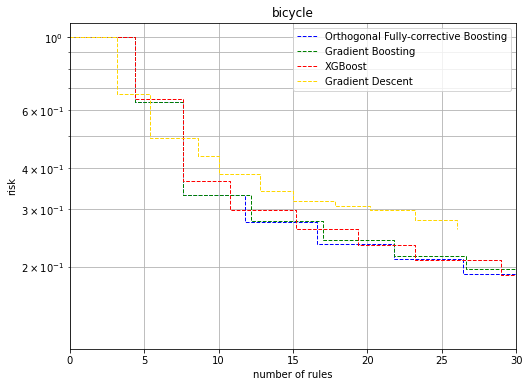

12.342277392898044
0:00:00.279167

0:00:00.335826

0:00:00.361141

0:00:00.430331

0:00:00.402892

orth_fc_Newton-CG: avg train risk: 0.10624587703314378 avg test risk 0.3364024102588953 &s: 20.48
0:00:00.403588

0:00:00.301565

0:00:00.343092

0:00:00.390067

0:00:00.395961

gpe_boosting_: avg train risk: 0.1423130325000928 avg test risk 0.24032479623786035 &s: 19.7
0:00:00.543245

0:00:00.594224

0:00:00.575425

0:00:00.618240

0:00:00.653020

xgb_keep_: avg train risk: 125.32649584577344 avg test risk 156.67576654158586 &s: 17.84
0:00:00.241232

0:00:00.256204

0:00:00.307275

0:00:00.227253

0:00:00.295522

mwg_boosting_: avg train risk: 0.1618926836408376 avg test risk 0.2071864895416368 &s: 15.3
orth_fc_Newton-CG auc: 6.681882812674488
[3.0, 6.6, 10.6, 14.2, 18.6, 22.8, 26.6, 30.4, 33.8, 38.2] [0.26571780775704174, 0.20559724934493, 0.1528399474173256, 0.12091390550708056, 0.0918313803513958, 0.06976691523041878, 0.04995842267189312, 0.04141357619200062, 0.03599427881863829, 0.02

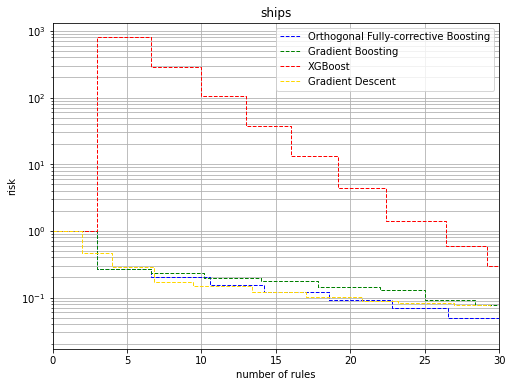

7.500299349437478
0:00:00.205702

0:00:00.213135

0:00:00.195565

0:00:00.208304

0:00:00.201721

orth_fc_Newton-CG: avg train risk: 0.08591136125258021 avg test risk 0.16547821104528967 &s: 15.02
0:00:00.358255

0:00:00.338043

0:00:00.308924

0:00:00.369884

0:00:00.331406

gpe_boosting_: avg train risk: 0.09530235938015126 avg test risk 0.20141039272174557 &s: 16.240000000000002
0:00:00.481951

0:00:00.482085

0:00:00.505726

0:00:00.460136

0:00:00.490503

xgb_keep_: avg train risk: 0.2576325236766237 avg test risk 0.3476377082236764 &s: 13.719999999999999
0:00:00.223401

0:00:00.151631

0:00:00.166348

0:00:00.218159

0:00:00.195149

mwg_boosting_: avg train risk: 0.12591637038917622 avg test risk 0.11901905003092697 &s: 12.459999999999999
orth_fc_Newton-CG auc: 4.255182201694767
[2.0, 4.0, 6.8, 9.8, 13.0, 16.2, 19.6, 23.0, 26.2, 29.6] [0.3032548393124188, 0.1805896649565109, 0.10281816235379607, 0.07211939599478312, 0.054442914508146624, 0.04290366085154505, 0.03526042163358771, 

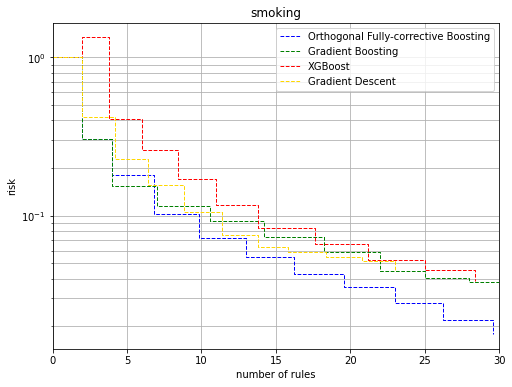

In [3]:
datasets = ['titanic','tic-tac-toe','iris','breast_cancer','load_wine','IBM_HR', 'telco_churn', 'GenderRecognition',
            'banknote', 'liver', 'magic', 'adult', 'digits5',
            'insurance','make_friedman1',
            'make_friedman2','make_friedman3','wage', 'Demographics','gdp','used_cars','load_diabetes',
            'boston','world_happiness_indicator', 'who_life_expectancy', 'mobile_prices', 'suicide_rates_cleaned',
            'videogamesales', 'red_wine_quality',
            'covid_vic','covid',
            'bicycle','ships','smoking']


values = [
    'mwg_boosting_',
    'gpe_boosting_', 
    'xgb_keep_', 
    'orth_fc_Newton-CG']
print(len(datasets))
cols = [10, 10, 10, 5, 6, 3, 4, 3, 10, 10, 5, 5, 3,
        10, 4, 10, 10, 10,
       2, 20, 10, 5, 4, 10, 5, 4, 3, 3, 5,
        10, 10, 10, 10, 10]
max_components = [30] * len(datasets)
max_components[11]=25
max_components[12]=20
max_components[5]=10
f = open("../analysis_results/compare_time.csv", 'w')
f.write('dataset'+(','+','.join(values))*4+'\n')
for i in range(len(datasets)):
#     try:
        max_risk = get_max_risk(datasets[i])
        train, test, ands, aucs, rt = compare3(datasets[i], col=cols[i], max_length=max_components[i])
#         print(ands)
        f.write(datasets[i] + ',')
        for value in values:
            f.write(str(sum(train[value])/10)+',')
        for value in values:
            f.write(str(sum(test[value])/10)+',')
#         f.write('\n,')
        for value in values:
            f.write(str(max(ands[value]))+',')
        for value in values:
            f.write(str(aucs[value])+',')
        for value in values:
            f.write(str(rt[value])+',')
        f.write('\n')
#     except:
#         f.write('\n')
f.close()

function to get times

In [4]:
from matplotlib import pyplot as plt
from random import random

def compare4(dataset_name, max_risk=1, repeat=5, col=10, 
            max_length=30, title=None):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    searches=['greedy', 'exhaustive']
    for search in searches:
        location='../output20230123realkd_cv_eval_no_reg_'+search
        objs = ['gpe','orth'] if search=='greedy' else ['orth']
        for obj in objs:
            algos = ['fc'] if obj=='orth' else ['boosting', 'fc'] if obj=='gpe' else ['keep']
            for algo in algos:
                methods = ['Newton-CG'] if algo=='fc' else ['']
                for method in methods:
                    done = True
                    fc_train=[0]*10
                    fc_test=[0]*10
                    ands = [0]*10
                    file_number=0
                    for i in range(repeat):
                        filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                            str(col) + '_rep' + str(i) + '.txt'
                        try:
                            f = open(location+'_normalised/'+dataset_name+'/'+filename, 'r')
                            file_number+=1
                        except:
                            print(obj, algo, method,'does not exist: ')
                            print(location+'/'+dataset_name+'/'+filename)
                            continue
                        j=-1
                        for line in f:
                            if 'iteration ' in line:
                                j+=1
                            if j>=10:
                                break
                            words=line.split(' ')
                            if 'fc train risk' in line:
                                fc_train[j] += float(words[-1])
                            elif 'fc test risk' in line:
                                fc_test[j] += float(words[-1])
                            if 'if' in line:
                                ands[j]+=line.count('=')+1
                    if done:
                        file_numbers[search+'_'+obj + '_' + algo + '_' + method] = file_number
                        train_risks[search+'_'+obj + '_' + algo + '_' + method]=fc_train
                        test_risks[search+'_'+obj + '_' + algo + '_' + method]=fc_test
                        and_counts[search+'_'+obj + '_' + algo + '_' + method]=ands
                        if file_number==0:
                            continue
                        print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                              'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,11))
    plt.figure(figsize=(8,6))
    colours = {}
    line_width = {}
    width = [1,1, 1, 1]*4
    i = 0
    colors=['blue','green','red','gold','deepskyblue','violet','cyan','brown','deepskyblue','purple', 'lime',
            'slategray','magenta','pink','olive','khaki']
    label_map={'greedy_gpe_boosting_':'Gradient Boosting', 'greedy_gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'greedy_orth_fc_Newton-CG': 'Greedy Orthogonal Fully-corrective Boosting', 'xgb_keep_': 'XGBoost', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
               'exhaustive_orth_fc_Newton-CG': 'Optimal Orthogonal Fully-corrective Boosting'
              }
    for item in train_risks:
        color = colors[i]
        colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
        print(and_counts[item])
        plt.step([0]+and_counts[item], [1]+train_risks[item], '--', color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.title(dataset_name if title is None else title + " risks")
    plt.xlabel('number of rules')
    plt.xlim(0,30)
    plt.ylabel('risk')
    plt.yscale('log')
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
    plt.gca().set_ylim(bottom=0)
    plt.legend()
    plt.show()
    
    return train_risks, test_risks, and_counts, aucs

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def plot_times(tic_gpes, tic_xgbs, tic_orths, tic_new_orths, tic_mwgs, savefile):
    tic_gpe_times=np.array([])
    tic_xgb_times=np.array([])
    tic_orth_times=np.array([])
    new_orth_times=np.array([])
    mwg_times = np.array([])
    for i in range(10):
        tic_gpe_times = np.append(tic_gpe_times, hmstoseconds(tic_gpes[i]))
        tic_xgb_times = np.append(tic_xgb_times, hmstoseconds(tic_xgbs[i]))
        tic_orth_times = np.append(tic_orth_times, hmstoseconds(tic_orths[i]))
        new_orth_times = np.append(new_orth_times, hmstoseconds(tic_new_orths[i]))
        mwg_times = np.append(mwg_times, hmstoseconds(tic_mwgs[i]))
    tic_gpe_times_sum=np.cumsum(tic_gpe_times)
    tic_xgb_times_sum=np.cumsum(tic_xgb_times)
    tic_orth_times_sum=np.cumsum(tic_orth_times)
    new_orth_times_sum = np.cumsum(new_orth_times)
    mwg_times_sum = np.cumsum(mwg_times)
    print(tic_gpe_times_sum)
    rg=list(range(1, 11))
    plt.figure(figsize=(3.5,3.5))
    plt.plot(rg, mwg_times_sum, 'v-', label='Gradient Sum')
    plt.plot(rg, tic_gpe_times_sum, 'o-', label='Gradient Boosting')
    plt.plot(rg, tic_xgb_times_sum, '>-', label='XGBoost')
    plt.plot(rg, tic_orth_times_sum, '^-', label='Naive FCOGB')
    plt.plot(rg, new_orth_times_sum, 's-', label='FCOGB')
    plt.xlabel('number of rules')
#     plt.ylabel("time (seconds)")
#     plt.legend()
    plt.grid()
    plt.savefig(savefile, bbox_inches = "tight") 

In [6]:
breast_gpe=['0:00:00.755056', '0:00:01.004230', '0:00:02.855858', '0:00:24.140140', '0:00:38.435723', '0:00:13.188960', '0:00:13.230922', '0:00:09.130535', '0:00:19.637853', '0:00:27.656477']
breast_xgb=['0:00:00.570690', '0:00:00.761002', '0:00:00.607723', '0:00:05.184244', '0:00:14.487850', '0:00:35.468122', '0:00:32.742045', '0:00:31.813855', '0:00:04.584688', '0:00:12.367203']
breast_orth=['0:00:00.475959', '0:00:00.852424', '0:00:05.586782', '0:00:33.590988', '0:00:45.237771', '0:00:43.558474', '0:01:01.536916', '0:01:08.900363', '0:01:08.325182', '0:01:03.280388']
breast_fast=['0:00:00.453358', '0:00:00.731647', '0:00:01.539592', '0:00:21.755362', '0:00:37.350054', '0:00:05.816117', '0:00:24.114822', '0:00:26.122812', '0:00:33.889967', '0:00:53.636361']
breast_mwg=['0:00:00.887125', '0:00:00.879971', '0:00:00.973911', '0:00:00.962496', '0:00:01.329237', '0:00:00.922350', '0:00:00.861245', '0:00:00.810215', '0:00:01.810805', '0:00:01.128920']

[  0.755056   1.759286   4.615144  28.755284  67.191007  80.379967
  93.610889 102.741424 122.379277 150.035754]


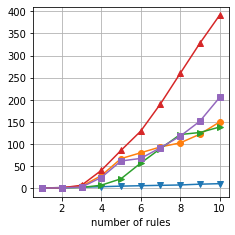

In [7]:
plot_times(breast_gpe, breast_xgb, breast_orth, breast_fast, breast_mwg, 'breast_time')

[0.275787 0.532643 0.790508 1.058243 1.335162 1.589159 1.841947 2.093031
 2.340618 2.602742]


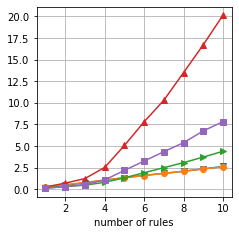

In [8]:
dia_gpe=['0:00:00.275787', '0:00:00.256856', '0:00:00.257865', '0:00:00.267735', '0:00:00.276919', '0:00:00.253997', '0:00:00.252788', '0:00:00.251084', '0:00:00.247587', '0:00:00.262124']
dia_xgb=['0:00:00.129437', '0:00:00.173532', '0:00:00.169680', '0:00:00.330890', '0:00:00.514597', '0:00:00.593593', '0:00:00.582354', '0:00:00.582483', '0:00:00.646505', '0:00:00.669529']
dia_orth=['0:00:00.261875', '0:00:00.442666', '0:00:00.531185', '0:00:01.282464', '0:00:02.543548', '0:00:02.734470', '0:00:02.499395', '0:00:03.194786', '0:00:03.223186', '0:00:03.424006' ]
dia_orth_new=['0:00:00.126477', '0:00:00.182577', '0:00:00.235198', '0:00:00.526444', '0:00:01.108148', '0:00:01.079305', '0:00:01.087228', '0:00:01.042202', '0:00:01.360436', '0:00:01.068484']
dia_mwg='0:00:00.199587', '0:00:00.265704', '0:00:00.279405', '0:00:00.310120', '0:00:00.269302', '0:00:00.283670', '0:00:00.225191', '0:00:00.240200', '0:00:00.285253', '0:00:00.273900'
plot_times(dia_gpe, dia_xgb, dia_orth, dia_orth_new, dia_mwg, 'diabete_time')